In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
walmart = pd.read_csv('H:\\\Time Series\\Walmart Footfalls Raw.csv')

In [4]:
walmart['t'] = np.arange(1,160)

In [5]:
walmart['t_square'] = walmart['t']*walmart['t']

In [7]:
walmart["log_footfalls"] = np.log(walmart["Footfalls"])

In [12]:
walmart.columns

Index(['Month', 'Footfalls', 't', 't_square', 'log_footfalls'], dtype='object')

In [9]:
p=walmart.Month[0]

In [11]:
p[0:3]

'Jan'

In [ ]:
walmart['months'] = 0

In [20]:
import warnings
warnings.filterwarnings('ignore')
for i  in range(len(walmart)):
    p = walmart.Month[i]
    walmart['months'][i] = p[0:3]

In [19]:
walmart.head()

,Month,Footfalls,t,t_square,log_footfalls,months
0,Jan-91,1709,1,1,7.443664,Jan
1,Feb-91,1621,2,4,7.390799,Feb
2,Mar-91,1973,3,9,7.587311,Mar
3,Apr-91,1812,4,16,7.502186,Apr
4,May-91,1975,5,25,7.588324,May


In [25]:
month_dummies = pd.get_dummies(walmart['months'])

In [26]:
Walmart1 = pd.concat([walmart,month_dummies],axis=1)

In [27]:
Walmart1

,Month,Footfalls,t,t_square,log_footfalls,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-91,1709,1,1,7.443664,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-91,1621,2,4,7.390799,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,9,7.587311,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-91,1812,4,16,7.502186,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,May-91,1975,5,25,7.588324,May,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,24025,7.638198,Nov,0,0,0,0,0,0,0,0,0,1,0,0
155,Dec-03,2141,156,24336,7.669028,Dec,0,0,1,0,0,0,0,0,0,0,0,0
156,Jan-04,1832,157,24649,7.513164,Jan,0,0,0,0,1,0,0,0,0,0,0,0
157,Feb-04,1838,158,24964,7.516433,Feb,0,0,0,1,0,0,0,0,0,0,0,0


<AxesSubplot:>

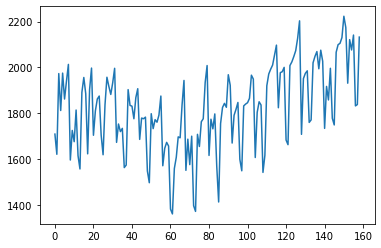

In [28]:
# Visualization - Time plot
Walmart1.Footfalls.plot()


In [29]:

# Data Partition
Train = Walmart1.head(147)
Test = Walmart1.tail(12)

In [30]:
import statsmodels.formula.api as smf

In [32]:
#Linear Model
linear_model = smf.ols('Footfalls ~ t',data=Train).fit()

In [33]:
predict_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))

In [34]:
predict_linear

147    1891.401640
148    1892.606277
149    1893.810914
150    1895.015551
151    1896.220188
152    1897.424825
153    1898.629462
154    1899.834099
155    1901.038736
156    1902.243373
157    1903.448010
158    1904.652647
dtype: float64

In [35]:
rmse_linear = np.sqrt(
    np.mean((np.array(Test['Footfalls']) - np.array(predict_linear))**2))

In [36]:
rmse_linear

209.92559265462572

In [37]:
#exponential
Exp = smf.ols('log_footfalls ~ t',data=Train).fit()

In [38]:
pred_exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))

In [39]:
rmse_exp = np.sqrt(
    np.mean((np.array(Test['Footfalls']) - np.array(np.exp(pred_exp)))**2))

In [40]:
rmse_exp

217.05263566813346

In [41]:
#quadratic
Quad = smf.ols('Footfalls ~ t + t_square',data=Train).fit()

In [44]:
pred_Quad = pd.Series(Quad.predict(Test[["t", "t_square"]]))

In [45]:
rmse_Quad = np.sqrt(np.mean((np.array(Test['Footfalls']) - np.array(pred_Quad))**2))

In [46]:
rmse_Quad

137.15462741356137

In [47]:
#additive seasonality
additive_sea = smf.ols('Footfalls ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()

In [50]:
pred_additive = pd.Series(additive_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))

In [51]:
rmse_additive = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_additive))**2))

In [52]:
rmse_additive

264.66439005687727

In [53]:
#Multiplicative Seasonality
Mul_sea = smf.ols('log_footfalls ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()

In [54]:

pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Footfalls']) - np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

268.19703253092024

In [55]:
#additive seasonality quadratice trend
additive_sea_Quad = smf.ols('Footfalls ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()

In [61]:
pred_add_sea_quad = pd.Series(additive_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))

In [62]:
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_add_sea_quad))**2))

In [63]:
rmse_add_sea_quad

50.607245841525724

In [64]:
#multiplicative seasonality linear trend
Mul_Add_sea = smf.ols(
    'log_footfalls ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',
    data=Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(
    np.mean((np.array(Test['Footfalls']) -
             np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

172.76726784671985

In [65]:
#testing model
data = {
    'Model':
    pd.Series([
        'rmse_linear', 'rmse_exp', 'rmse_Quad', 'rmse_additive',
        'rmse_Mult_sea', 'rmse_add_sea_quad'
    ]),
    'RMSE_Values':
    pd.Series([
        rmse_linear, rmse_exp, rmse_Quad, rmse_additive, rmse_Mult_sea,
        rmse_Mult_add_sea
    ])
}

In [66]:
table_rmse = pd.DataFrame(data)

In [67]:
table_rmse

,Model,RMSE_Values
0,rmse_linear,209.925593
1,rmse_exp,217.052636
2,rmse_Quad,137.154627
3,rmse_additive,264.664390
4,rmse_Mult_sea,268.197033
5,rmse_add_sea_quad,172.767268


In [68]:
prediction_data = pd.read_excel('H:\\Time Series\\Predict_new.xlsx')

In [69]:
modelfull = smf.ols('Footfalls ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Walmart1).fit()

In [70]:
pred_new = pd.Series(modelfull.predict(prediction_data))

In [71]:
pred_new

0     2193.807626
1     2229.969736
2     2200.670308
3     2311.293957
4     2356.071452
5     2036.848947
6     2187.241826
7     2181.480859
8     2234.104508
9     1999.997498
10    1972.995363
11    2280.493228
dtype: float64

In [73]:
prediction_data['forcast_footfall'] = pd.Series(pred_new)

In [74]:
prediction_data.head()

,Month,t,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,forcast_footfall
0,2004-04-01,160,25600,0,0,0,1,0,0,0,0,0,0,0,0,2193.807626
1,2004-05-01,161,25921,0,0,0,0,1,0,0,0,0,0,0,0,2229.969736
2,2004-06-01,162,26244,0,0,0,0,0,1,0,0,0,0,0,0,2200.670308
3,2004-07-01,163,26569,0,0,0,0,0,0,1,0,0,0,0,0,2311.293957
4,2004-08-01,164,26896,0,0,0,0,0,0,0,1,0,0,0,0,2356.071452


In [75]:
full_res= Walmart1.Footfalls-modelfull.predict(Walmart1)

In [76]:
full_res

0      57.501433
1      10.366249
2      68.731066
3     -96.818948
4      42.891432
         ...    
154    -5.333519
155     8.033024
156   -65.869774
157   -31.877448
158   -44.385122
Length: 159, dtype: float64

In [81]:
import statsmodels.graphics.tsaplots as tsa_plots

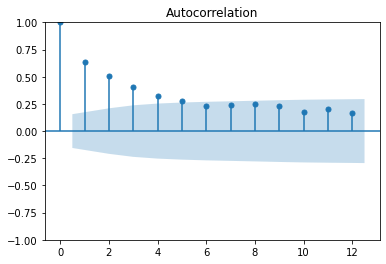

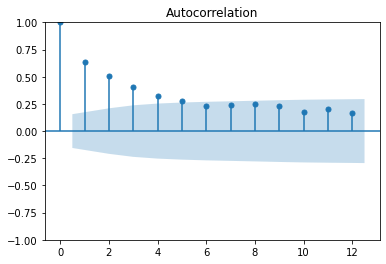

In [82]:
tsa_plots.plot_acf(full_res,lags=12)

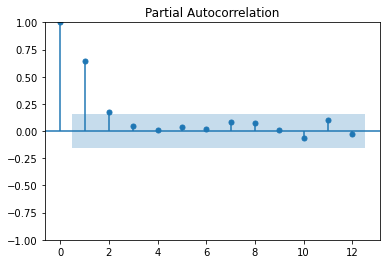

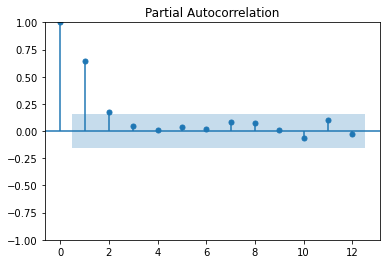

In [83]:
tsa_plots.plot_pacf(full_res, lags=12)

In [ ]:
# Alternative approach for ACF plot
# from pandas.plotting import autocorrelation_plot
# autocorrelation_ppyplot.show()

In [84]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

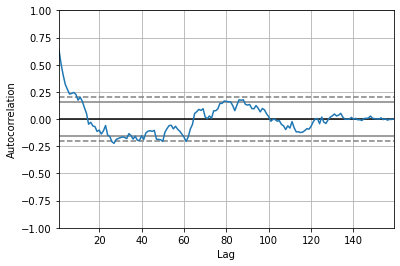

In [85]:
autocorrelation_plot(full_res)

In [86]:
#Ar model
from statsmodels.tsa.ar_model import AutoReg

In [87]:
model_AR = AutoReg(full_res,lags=[1])

In [88]:
model_fit = model_AR.fit()

In [89]:
print('Coefficients: %s' % model_fit.params)

Coefficients: const   -0.543345
y.L1     0.638663
dtype: float64


In [92]:
pred_res = model_fit.predict(start=len(full_res), end=len(full_res)+len(prediction_data)-1, dynamic=False)
pred_res.reset_index(drop=True, inplace=True)


# The Final Predictions using ASQT and AR(1) Model
final_pred = pred_new + pred_res
final_pred

0     2164.917162
1     2210.975131
2     2187.995818
3     2302.655889
4     2350.011295
5     2032.435206
6     2183.879589
7     2178.790179
8     2231.842726
9     1998.009637
10    1971.182445
11    2278.792040
dtype: float64